In [ ]:
!pip install stopwordsiso

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm
tqdm.pandas()


In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# os.chdir("./drive/MyDrive/NLP Project/")
path="./splitData"

In [ ]:
df_censored=pd.read_pickle(path+"/censored.pickle")

In [ ]:
len_censored=len(df_censored)

In [ ]:
df_uncensored=pd.read_pickle(path+"/not_censored.pickle")

In [ ]:
df_uncensored.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
0,mCClUNCqwe,转发微博,2012-01-03 02:02:27,False,False,"[-0.06742318719625473, -0.07985331863164902, -..."
1,mRsOcOLTlc,uK3RXUYW3： u0AGMTTVD： ！！！！！！！！,2012-01-03 01:17:39,False,False,"[-0.00941894855350256, 0.01217515766620636, -0..."
2,mH44qG6iUm,求一切順利,2012-01-03 01:15:36,False,False,"[0.06672303378582001, -0.055423811078071594, -..."
3,mZmwFtOdVX,想要uK3RXUYW3： ukn： 全都想要啊QAQ,2012-01-03 01:12:55,False,False,"[0.006807179655879736, 0.06354787945747375, -0..."
4,mQkLJSl8bf,ukn： uMLLV3ZCO： 转发微博,2012-01-03 01:10:42,False,False,"[-0.020706146955490112, -0.04338109493255615, ..."


In [ ]:
df_data=pd.concat([df_censored,df_uncensored])


In [ ]:
del df_censored
del df_uncensored
df_data.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
0,mkTL1pvXTN,这王某人与中国青年报怎么这么有缘啊。uRLOGZLR4： 原来是个大流氓,2012-01-07 22:29:56,2012-03-03 03:35:43.903155,True,"[0.006624801550060511, 0.031350668519735336, 0..."
1,m5PIm1JzG8,经常看到有代表四处调研，你代表的是哪个行业，就好好调研一下本行业的问题好不好？自己的工作都做...,2012-01-05 09:00:03,2012-01-30 21:36:44.229791,True,"[0.03378220275044441, -0.007479660212993622, 0..."
2,mJGNyWD5fj,刚在宝宝的书架上发现这本书，翻了一下，历史事实描述一派胡言。问宝宝，这本书的内容你们考试吗？...,2012-01-02 12:45:58,False,True,"[0.009367837570607662, -0.03505528345704079, -..."
3,m3e5KqAhFh,应该找uRLOWL0ZX： 去影他相！新年流流揸公车出来行，仲要违章，真是岂有此理！,2012-01-03 18:15:24,2012-01-30 19:15:54.549843,True,"[-0.02759631723165512, -0.009455885738134384, ..."
4,mkTLyULvfH,崔永元：微博春晚节目——天津快板：竹板这么一打啊，啥也不能说，不能说食品，不能说动车，不能说...,2012-01-07 12:02:02,2012-02-28 11:08:24.583212,True,"[0.002411450492218137, 0.025735968723893166, 0..."


In [ ]:
from stopwordsiso import stopwords
def stop_word(text):
    stopword = stopwords(["zh"])
    remove_stw = [word for word in str(text).split() if not word in stopword]
    return remove_stw

import re
def remove_english_chars(text):
  text=re.sub(r'[a-zA-Z0-9]', r'', text)
  # text=text.split(" ")
  # text_lst=[w for w in text if not re.match(r'[A-Z a-z 0-9]+', w, re.I)]
  # " ".join(text_lst)
  return text

def preprocess_text(text):
  text= remove_english_chars(text)
  text=stop_word(text)
  return " ".join(text)

In [ ]:
df_data["text"]=df_data["text"].progress_apply(lambda x: preprocess_text(str(x)))

  0%|          | 0/671124 [00:00<?, ?it/s]

In [ ]:
df_data["permission_denied"]=df_data["permission_denied"].astype("bool").astype("int")

In [ ]:
df_data.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
0,mkTL1pvXTN,这王某人与中国青年报怎么这么有缘啊。： 原来是个大流氓,2012-01-07 22:29:56,2012-03-03 03:35:43.903155,1,"[0.006624801550060511, 0.031350668519735336, 0..."
1,m5PIm1JzG8,经常看到有代表四处调研，你代表的是哪个行业，就好好调研一下本行业的问题好不好？自己的工作都做...,2012-01-05 09:00:03,2012-01-30 21:36:44.229791,1,"[0.03378220275044441, -0.007479660212993622, 0..."
2,mJGNyWD5fj,刚在宝宝的书架上发现这本书，翻了一下，历史事实描述一派胡言。问宝宝，这本书的内容你们考试吗？...,2012-01-02 12:45:58,False,1,"[0.009367837570607662, -0.03505528345704079, -..."
3,m3e5KqAhFh,应该找： 去影他相！新年流流揸公车出来行，仲要违章，真是岂有此理！,2012-01-03 18:15:24,2012-01-30 19:15:54.549843,1,"[-0.02759631723165512, -0.009455885738134384, ..."
4,mkTLyULvfH,崔永元：微博春晚节目——天津快板：竹板这么一打啊，啥也不能说，不能说食品，不能说动车，不能说...,2012-01-07 12:02:02,2012-02-28 11:08:24.583212,1,"[0.002411450492218137, 0.025735968723893166, 0..."


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_data, test_size=0.2)

In [ ]:
test.head()

,mid,text,created_at,deleted_last_seen,permission_denied,guse
20192,mT51V5vB39,盘点年度牛人,2012-01-02 19:51:00,False,0,"[0.015595925971865654, -0.006477873306721449, ..."
322024,mRckmG7sTB,那即是社長 早已殺青了,2012-01-03 14:44:55,False,0,"[0.011473389342427254, -0.032045163214206696, ..."
28194,mzHaR96Gev,轉發微博,2012-01-03 02:39:52,False,0,"[-0.06240246444940567, -0.08615030348300934, 0..."
468089,mSazSjD76o,红颜如此绽放，让人看了忍不住再看。,2012-01-02 16:49:51,False,0,"[-0.08432669937610626, -0.032167840749025345, ..."
388066,m0kxZWc4CI,嗲嗲： 小仙人球,2012-01-04 00:45:45,False,0,"[-0.011510929092764854, 0.0634203776717186, 0...."


In [ ]:
# X=data["tweet"]
# y=data["label"]

In [ ]:
#importing required packages
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train=train["text"].to_numpy()
y_train = train["permission_denied"].to_numpy()
y_test = test["permission_denied"].to_numpy()
X_test=test["text"].to_numpy()


In [ ]:
np.save(path+"/X_train.npy",X_train)

In [ ]:
np.load(path+"/X_train.npy",allow_pickle=True)

array(['识骨寻踪口味好重啊。看完了三季的犯罪心理和我以为我可以战无不胜了。刚才吃着饭打开识骨寻踪。主角还没出来我就关了。我的母亲啊。这个也太口味重了吧吧吧。敢问： 各位看吃饭的盆友看过么？？？',
       '踹哥，我要喝普洱，记得先洗茶啊！否则，你的假牙又保不住了！哈哈哈', '信仰危机是中国面临的最深层危机。', ...,
       '好漂亮的水蓝色，一直觉得蓝色能让人看起来很美呢 喜欢日韩范儿，就关注：', '挖槽魂魄家的央', '花心'],
      dtype=object)

In [ ]:
# X_train

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
import re
import jieba

In [ ]:
count_vectorizer = CountVectorizer(tokenizer=jieba.lcut)
model_count=count_vectorizer.fit(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:

X_train_count=count_vectorizer.transform(X_train)
X_test_count=count_vectorizer.transform(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
del df_data

In [ ]:
import gc
 
# Returns the number of
# objects it has collected
# and deallocated
collected = gc.collect()

In [ ]:
count_vectorizer

CountVectorizer(tokenizer=<bound method Tokenizer.lcut of <Tokenizer dictionary=None>>)

In [ ]:
a={"model":model_count}

In [ ]:

with open(path+"/count_vectorizer1.pickle", 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

TypeError: ignored

In [ ]:

# count_vectorizer
import pickle
pickle.dump(count_vectorizer, open(path+"/count_vectorizer.pickle", 'wb'))

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-2410efcc9bc3>", line 3, in <module>
    pickle.dump(count_vectorizer, open("/count_vectorizer.pickle", 'wb'))
TypeError: can't pickle _thread.RLock objects

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local

TypeError: ignored

**Naive Bayes**

In [ ]:
#defining model and fitting train data
model = MultinomialNB()
model.fit(X_train_count,y_train)##model traing took place here

MultinomialNB()

In [ ]:
y_predict= model.predict(X_test_count)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
#printing confusion matrix
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(y_test,y_predict)
matrix

array([[101315,   6103],
       [  7175,  19632]])

In [ ]:
#printing accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.901076550568076

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


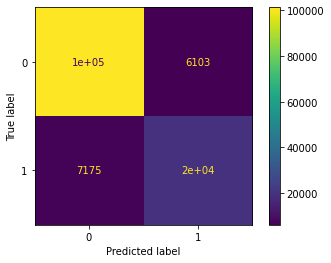

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_count, y_test)  
plt.show()

In [ ]:
import pickle
pickle.dump(model, open(path+"/Naive_Bayes_Model.pickle", 'wb'))

**Decision Tree**

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

In [ ]:
# #hyper parameter tuning
# #importing gridsearchcv
# from sklearn.model_selection import GridSearchCV
# #giving parameters of decision tree
# params = {
#     "criterion":("gini", "entropy"), 
#     "splitter":("best", "random"), 
#     "max_depth":(list(range(1, 20))), 
#     "min_samples_split":[2, 3, 4], 
#     "min_samples_leaf":list(range(1, 20)), 
# }

# #calling decision tree classifier
# tree_clf = DecisionTreeClassifier(random_state=42)
# #applying gridsearchcv for hyper parameter tuning
# tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
# #fitting the data
# tree_cv.fit(X_train_count[:1000],y_train[:1000])
# #to print the best parameters after hyper parameter tuning
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")
# from sklearn.tree import DecisionTreeClassifier
# model_dt = DecisionTreeClassifier(**best_params)
# model_dt.fit(X_train_count,y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'})


DecisionTreeClassifier(max_depth=7, min_samples_split=4)

In [ ]:
# model_dt=DecisionTreeClassifier(criterion="gini", max_depth= 7, min_samples_leaf= 1, min_samples_split= 4, splitter='best')
# model_dt.fit(X_train_count,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=4)

In [ ]:
# y_predict_dt= model_dt.predict(X_test_count)
# y_predict_dt

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# from sklearn.metrics import confusion_matrix
# matrix_dt= confusion_matrix(y_test,y_predict_dt)
# matrix_dt

array([[39654, 10387],
       [13276, 20326]])

In [ ]:
# #printing accuracy score
# from sklearn.metrics import accuracy_score

# accuracy_score(y_test, y_predict_dt)

0.7170952739619574

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


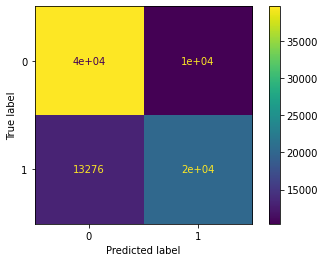

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model_dt, X_test_count, y_test)  
# plt.show()

**Random forest classifier**

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt','log2']

# # Number of trees in random forest
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid with all parameters defined
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# #calling random forest classifier
# rand_clf = RandomForestClassifier(random_state=42)
# #applying randomised search cv for hyper parameter tuning
# rand_cv = RandomizedSearchCV(rand_clf, random_grid, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
# #fitting train data using randomised search cv
# rand_cv.fit(X_train_count[:1000],y_train[:1000])
# #to print best parameters after hyper parameter tuning

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   scoring='accuracy', verbose=1)

In [ ]:
# best_params =rand_cv.best_params_
# print(f"Best paramters: {best_params})")

Best paramters: {'n_estimators': 1577, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': False})


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model_rf = RandomForestClassifier(n_estimators= 1577, min_samples_split= 2, min_samples_leaf= 4, max_features='auto', max_depth= 110, bootstrap=True)
# model_rf.fit(X_train_count,y_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, n_estimators=1577)

In [ ]:
# y_predict_rf= model_rf.predict(X_test_count)
# y_predict_rf

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# from sklearn.metrics import confusion_matrix
# matrix_rf= confusion_matrix(y_test,y_predict_rf)
# matrix_rf

array([[48336,  1705],
       [16615, 16987]])

In [ ]:
# #printing accuracy score
# from sklearn.metrics import accuracy_score

# accuracy_score(y_test, y_predict_rf)

0.7809739009839437

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


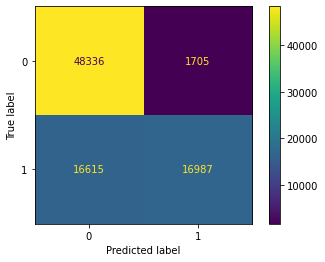

In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(model_rf, X_test_count, y_test)  
# plt.show()

**svm**

In [ ]:
from sklearn.svm import LinearSVC, SVC


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.5,0.8,1.0]
}
svm = LinearSVC()
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train_count,y_train)
print("Best Parameters of liner kernal :", svm_cv.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

Best Parameters of liner kernal : {'C': 0.5}


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
linear_svc_model = LinearSVC(C=0.8)
linear_svc_model.fit(X_train_count,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=0.8)

In [ ]:
y_predict_svm= linear_svc_model.predict(X_test_count)
y_predict_svm

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix
matrix_svm= confusion_matrix(y_test,y_predict_svm)
matrix_svm

array([[104663,   2755],
       [  7785,  19022]])

In [ ]:
#printing accuracy score
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict_svm)

0.9214751350344571

In [ ]:
import pickle
pickle.dump(linear_svc_model, open(path+"/linear_svc_model_Model.pickle", 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


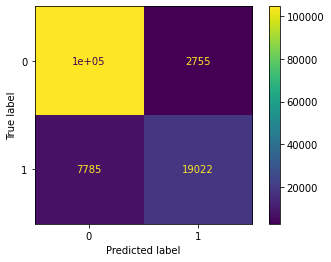

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(linear_svc_model, X_test_count, y_test)  
plt.show()